# Finding Heavy Traffic Indicators on I-94

- In this project we will be using the I-94 Interstate highway dataset to show what indicators point to heavy traffic.
- The dataset was made avalable by John Hogue and can be found on the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume

## Importing and Describing the Dataset

In [1]:
import pandas as pd
traffic= pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

After importing the dataset, we will take a look at the first and last 5 rows, the column count and its corresponting data types.

In [2]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [4]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


This dataset contains 48,204 rows and no null values were found in any column.

A quick summary of the dataset attributes:

#### Data Set Information:

Hourly Interstate 94 Westbound traffic volume for MN DoT ATR station 301, roughly midway between Minneapolis and St Paul, MN. Hourly weather features and holidays included for impacts on traffic volume.


#### Attribute Information:

- holiday: Categorical US National holidays plus regional holiday, Minnesota State Fair
- temp: Numeric Average temp in kelvin
- rain_1h: Numeric Amount in mm of rain that occurred in the hour
- snow_1h: Numeric Amount in mm of snow that occurred in the hour
- clouds_all: Numeric Percentage of cloud cover
- weather_main: Categorical Short textual description of the current weather
- weather_description: Categorical Longer textual description of the current weather
- date_time: DateTime Hour of the data collected in local CST time
- traffic_volume: Numeric Hourly I-94 ATR 301 reported westbound traffic volume

Source (UCI Machine Learning Repository): https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume

## Exploring the Data

We will visualize the data with an imported library called matplotlib

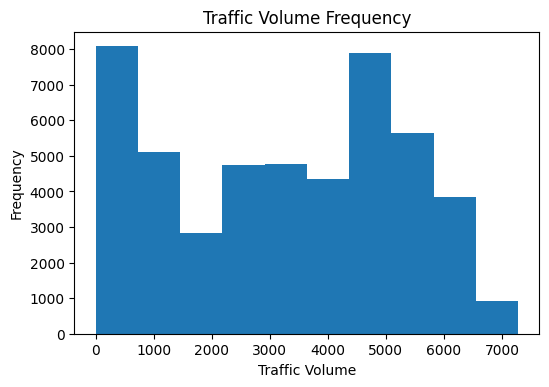

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

traffic_volume = traffic["traffic_volume"]
#traffic_volume.value_counts()
plt.hist(traffic_volume)
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.title("Traffic Volume Frequency")
plt.show()

traffic_volume.describe()

We will explore day/night time fluctuations of the dataset in the cells below by dividing our data into daytime data(7 a.m - 6 p.m) and night time data(8 p.m to 6 a.m).

In [6]:
# Create a datetime_series and convert it to hours
datetime_series= pd.to_datetime(traffic["date_time"])
datetime_series= datetime_series.dt.hour

# Convert date_time column to a datetime obect
traffic["date_time"]=pd.to_datetime(traffic["date_time"])

# Slice out the date_time series between 7 and 18 from the DataFrame traffic
day_time= traffic[datetime_series[:].between(7,18)]
#traffic["month"]=0
day_time["traffic_volume"].describe()
day_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23877 entries, 0 to 48198
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              23877 non-null  object        
 1   temp                 23877 non-null  float64       
 2   rain_1h              23877 non-null  float64       
 3   snow_1h              23877 non-null  float64       
 4   clouds_all           23877 non-null  int64         
 5   weather_main         23877 non-null  object        
 6   weather_description  23877 non-null  object        
 7   date_time            23877 non-null  datetime64[ns]
 8   traffic_volume       23877 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 1.8+ MB


In [7]:
# day_time= traffic[datetime_series[:].between(7,18)]
# day_time["traffic_volume"].describe()

In [8]:
night_time= traffic[datetime_series[:].between(19,23) | datetime_series[:].between(0,6)]

night_time["traffic_volume"].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

Add both night time and day time row length to double check if we receive the original dataframe length of 48,204. If the sum doesn't equal to the original length then there might be missing values we have not accounted for when creating the daytime and night time series.

In [9]:
sum_rows_length= len(day_time)+len(night_time)
sum_rows_length

48204

Using the above day time and night time data we will visualize it via a histogram

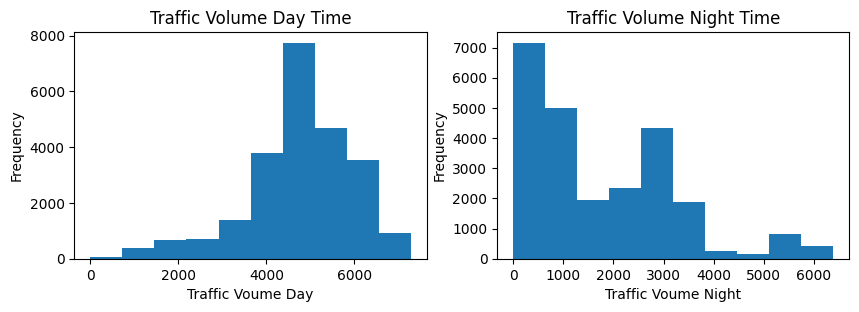

In [10]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.hist(day_time["traffic_volume"])
plt.title("Traffic Volume Day Time")
plt.xlabel("Traffic Voume Day")
plt.ylabel("Frequency")
plt.subplot(1,2,2)

plt.hist(night_time["traffic_volume"])
plt.title("Traffic Volume Night Time")
plt.xlabel("Traffic Voume Night")
plt.ylabel("Frequency")
plt.show()

The day time histogramm is left skewed and shows that 75% of traffic had 5559 cars passing the tracking station per hour.

The night time histogramm is right skewed, here 75% of volume amounted to about 2819 cars passing the tracking station per hous. 

We will not deed night time traffic if we are looking for indicators of heavy traffic because volume starts to decrease heavily after the evening rush hour.

In the cells below we will aggregate the traffic Volume data by the month

In [11]:
# Create a new column called month
# Enter month for each row
day_time_copy = day_time.copy()
day_time_copy["month"] = day_time_copy["date_time"].dt.month

In [12]:
traffic_by_month = day_time_copy.groupby("month").mean()
traffic_by_month.head(20)

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
month,,,,,
1,265.483409,0.015080,0.000631,58.554108,4495.613727
2,266.663789,0.004019,0.000000,51.550459,4711.198394
3,273.619940,0.015839,0.000000,56.827811,4889.409560
4,279.661071,0.105343,0.000000,59.221525,4906.894305
5,289.282668,0.130863,0.000000,56.548825,4911.121609
6,294.576068,0.271121,0.000000,48.612374,4898.019566
7,296.785052,4.412258,0.000000,42.176619,4595.035744
8,295.119191,0.228113,0.000000,42.556892,4928.302035
9,292.520287,0.289807,0.000000,45.184112,4870.783145


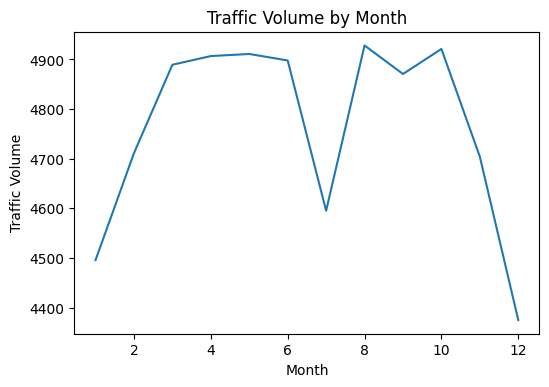

In [13]:
plt.plot(traffic_by_month.index,traffic_by_month["traffic_volume"])
plt.title("Traffic Volume by Month")
plt.xlabel("Month")
plt.ylabel("Traffic Volume")
plt.show()

I the above line plot we can tell that between Feb and June the traffic is very heavy and drops down significantly in july before picking up between August and October.
Starting around October to December there is a significant drop in traffic once again.

In order to analyze these fluctuations a bit more extensively, the next few cells will show the mean traffic volume per day in week

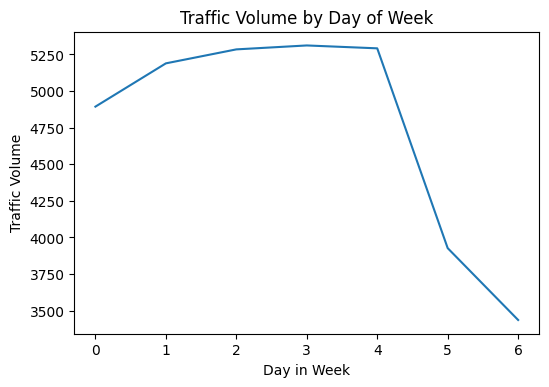

In [14]:
day_time_copy["dayofweek"]= day_time_copy["date_time"].dt.dayofweek

traff_dayofweek = day_time_copy.groupby("dayofweek").mean()
traff_dayofweek.head(10)

plt.plot(traff_dayofweek.index,traff_dayofweek["traffic_volume"])
plt.title("Traffic Volume by Day of Week")
plt.xlabel("Day in Week")
plt.ylabel("Traffic Volume")
plt.show()


During the weekdays/business days the traffic in very high and drops off during the weekend.
Further investigation of the weekday and weekend traffic might yield better results when looking for heavy traffic indicators. The dataset will therefore be split into two, a weekday and a weekend traffic set. Both sets will be visualized below.

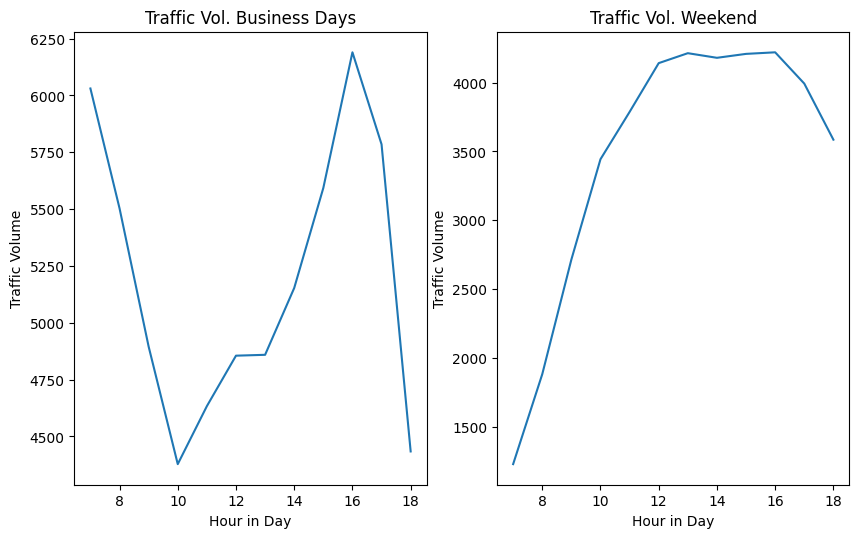

In [15]:
day_time_copy["hour"] = day_time_copy["date_time"].dt.hour
business_days= day_time_copy.copy()[day_time_copy["dayofweek"]<=4]

weekend=day_time_copy.copy()[day_time_copy["dayofweek"]>5]

hour_business=business_days.groupby("hour").mean()

hour_weekend=weekend.groupby("hour").mean()

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title("Traffic Vol. Business Days")
plt.xlabel("Hour in Day")
plt.ylabel("Traffic Volume")
plt.plot(hour_business.index,hour_business["traffic_volume"])

plt.subplot(1,2,2)
plt.title("Traffic Vol. Weekend")
plt.xlabel("Hour in Day")
plt.ylabel("Traffic Volume")
plt.plot(hour_weekend.index,hour_weekend["traffic_volume"])

plt.show()

The rush hours on business days occur during the morning time peak of aroun 7 a.m and at an evening peak of 4 p.m. 
During the weekends the rush hour plateaus from around 12 to 4 p.m. 

# Weather and Traffic Volume

This section will explore the correlation between the traffic volume and the numerical weather columns. After exploring the header columns for the numerical weather values a scatter plot will be created to analyze the pearsons r correlation between the different weather types.

In [16]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


In [17]:
weather_corr = traffic.corr()[["temp","rain_1h","snow_1h","clouds_all"]]
weather_corr.head(20)

,temp,rain_1h,snow_1h,clouds_all
temp,1.000000,0.009069,-0.019755,-0.101976
rain_1h,0.009069,1.000000,-0.000090,0.004818
snow_1h,-0.019755,-0.000090,1.000000,0.027931
clouds_all,-0.101976,0.004818,0.027931,1.000000
traffic_volume,0.130299,0.004714,0.000733,0.067054


In [18]:
import seaborn as sns

(230.0, 400.0)

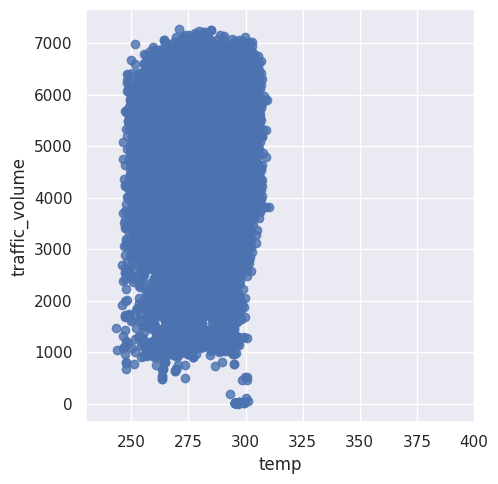

In [21]:
sns.set()
sns.lmplot(data=day_time_copy,x="temp",y="traffic_volume",fit_reg=False)
plt.xlim(230,400)


The stronggest positive correlation is found when comparing temperature with traffic volume(Pearsons r= 0.130299). Visualizing the scatter plot between these two variables does not yield any usable indicators for heavy traffic.

The next step that we take in analyzing the weather data is to aggregate the categorical weather related columns and apply the `.mean()` function to the aggregate. Thi will result in a mean traffic volume for each individual weather category 


In [27]:
weather_main = day_time_copy.groupby("weather_main").mean()

weather_descript = day_time_copy.groupby("weather_description").mean()


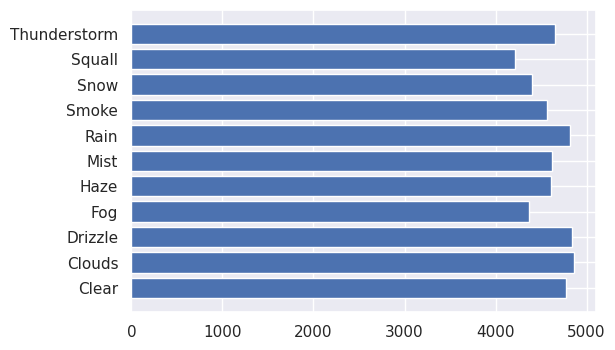

In [31]:
plt.barh(weather_main.index,weather_main["traffic_volume"])
plt.show()

According to the above plot where is no clear indicator of heavy traffic, Thunderstorm, Rain, Drizzle, Clouds and Clear have a similar mean traffic value. There are also no weather patterns show an traffic volume exceeding 5000 cars.

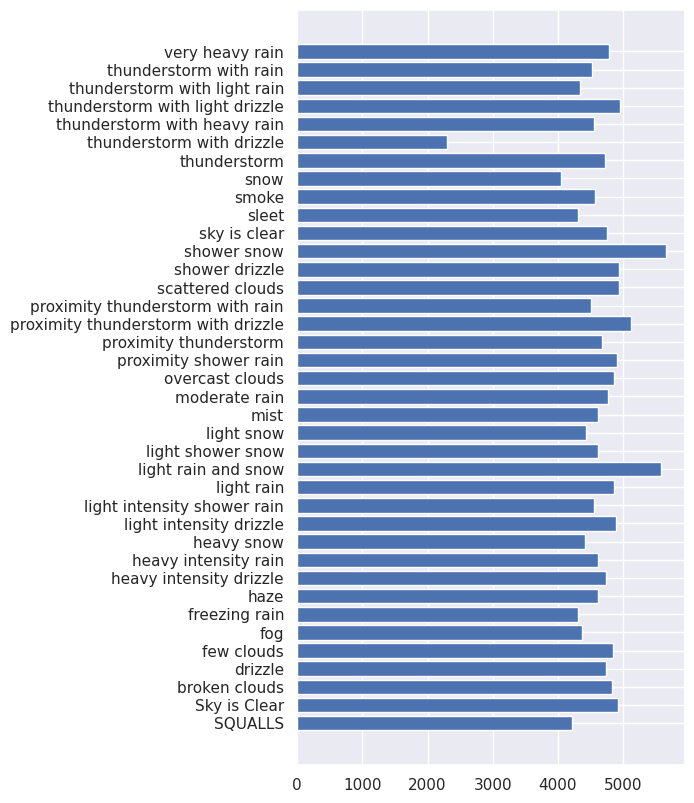

In [38]:
plt.figure(figsize=(5,10))
plt.barh(weather_descript.index,weather_descript["traffic_volume"])

plt.show()

From the above plot we can see that "shower snow" and "light rain and snow" lead to an increase of traffic volume above 5000.

# Conclusion

When analyzing the Heavy Traffic Indicators dataset we can hypothesize that the following indicators lead to an increased volume of traffic on the I-94:

- Weekdays Morning and Evening rush hour traffic
- Noon until early evening is an indicator of heavy traffic during weekends.
- February-June and August - December show a higher volume of traffic Mondays to Fridays
- Temperature does not play a role
- Shower snow / light rain and snow                                 